<img src="https://d29g4g2dyqv443.cloudfront.net/sites/default/files/pictures/2018/convolution-2.gif"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/600px-Comparison_convolution_correlation.svg.png"/>

<img src="https://miro.medium.com/0*e-SMFTzO8r7skkpc"/>

<a href="https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1">convolution(합성곱)</a>

<img src="images/1001/1.jpg"/>

In [22]:
import numpy as np

# 예시 행렬
A = np.array([[4, -2],
              [1,  1]])

# numpy를 이용해 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(A)

print("고유값(Eigenvalues):")
print(eigenvalues)

print("\n고유벡터(Eigenvectors):")
print(eigenvectors)

고유값(Eigenvalues):
[3. 2.]

고유벡터(Eigenvectors):
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


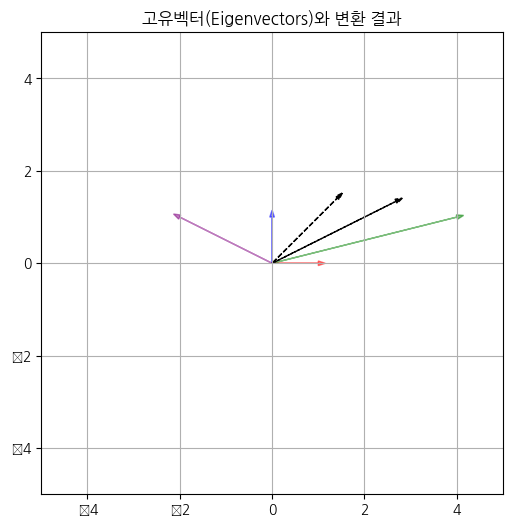

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

# 행렬 정의
A = np.array([[4, -2],
              [1,  1]])

# 고유값과 고유벡터
eigenvalues, eigenvectors = np.linalg.eig(A)

# 원래 단위벡터들
x = np.array([[1,0], [0,1]])

# 변환된 벡터
Ax = A @ x.T

plt.figure(figsize=(6,6))
ax = plt.gca()

# 원래의 기준축 (빨간색, 파란색)
for i in range(2):
    ax.arrow(0, 0, x[i,0], x[i,1], head_width=0.1, color=['r','b'][i], alpha=0.5)

# 변환된 축 (초록색, 보라색)
for i in range(2):
    ax.arrow(0, 0, Ax[0,i], Ax[1,i], head_width=0.1, color=['g','purple'][i], alpha=0.5)

# 고유벡터 (검정색)
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i]
    ax.arrow(0, 0, vec[0]*eigenvalues[i], vec[1]*eigenvalues[i],
             head_width=0.1, color='k', linestyle='--')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')
plt.grid(True)
plt.title("고유벡터(Eigenvectors)와 변환 결과")
plt.show()

<img src="images/1001/2.png"/>

In [24]:
import numpy as np

# 예시 행렬
A = np.array([[4, -2],
              [1,  1]])

# numpy를 이용해 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(A)

print("고유값(Eigenvalues):")
print(eigenvalues)

print("\n고유벡터(Eigenvectors):")
print(eigenvectors)

고유값(Eigenvalues):
[3. 2.]

고유벡터(Eigenvectors):
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


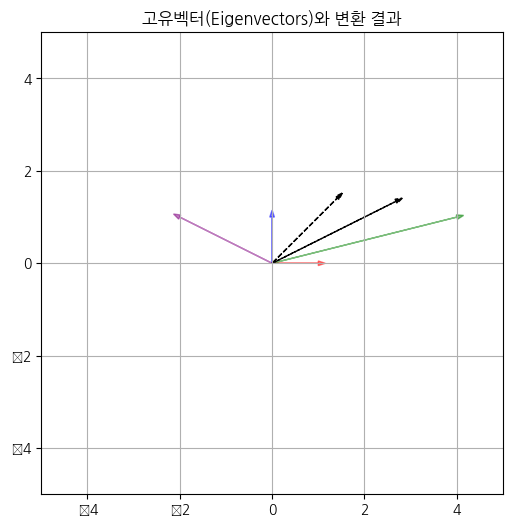

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 행렬 정의
A = np.array([[4, -2],
              [1,  1]])

# 고유값과 고유벡터
eigenvalues, eigenvectors = np.linalg.eig(A)

# 원래 단위벡터들
x = np.array([[1,0], [0,1]])

# 변환된 벡터
Ax = A @ x.T

plt.figure(figsize=(6,6))
ax = plt.gca()

# 원래의 기준축 (빨간색, 파란색)
for i in range(2):
    ax.arrow(0, 0, x[i,0], x[i,1], head_width=0.1, color=['r','b'][i], alpha=0.5)

# 변환된 축 (초록색, 보라색)
for i in range(2):
    ax.arrow(0, 0, Ax[0,i], Ax[1,i], head_width=0.1, color=['g','purple'][i], alpha=0.5)

# 고유벡터 (검정색)
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i]
    ax.arrow(0, 0, vec[0]*eigenvalues[i], vec[1]*eigenvalues[i],
             head_width=0.1, color='k', linestyle='--')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')
plt.grid(True)
plt.title("고유벡터(Eigenvectors)와 변환 결과")
plt.show()

<img src="images/1001/3.jpg"/>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1744\1445175752.py:79: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()


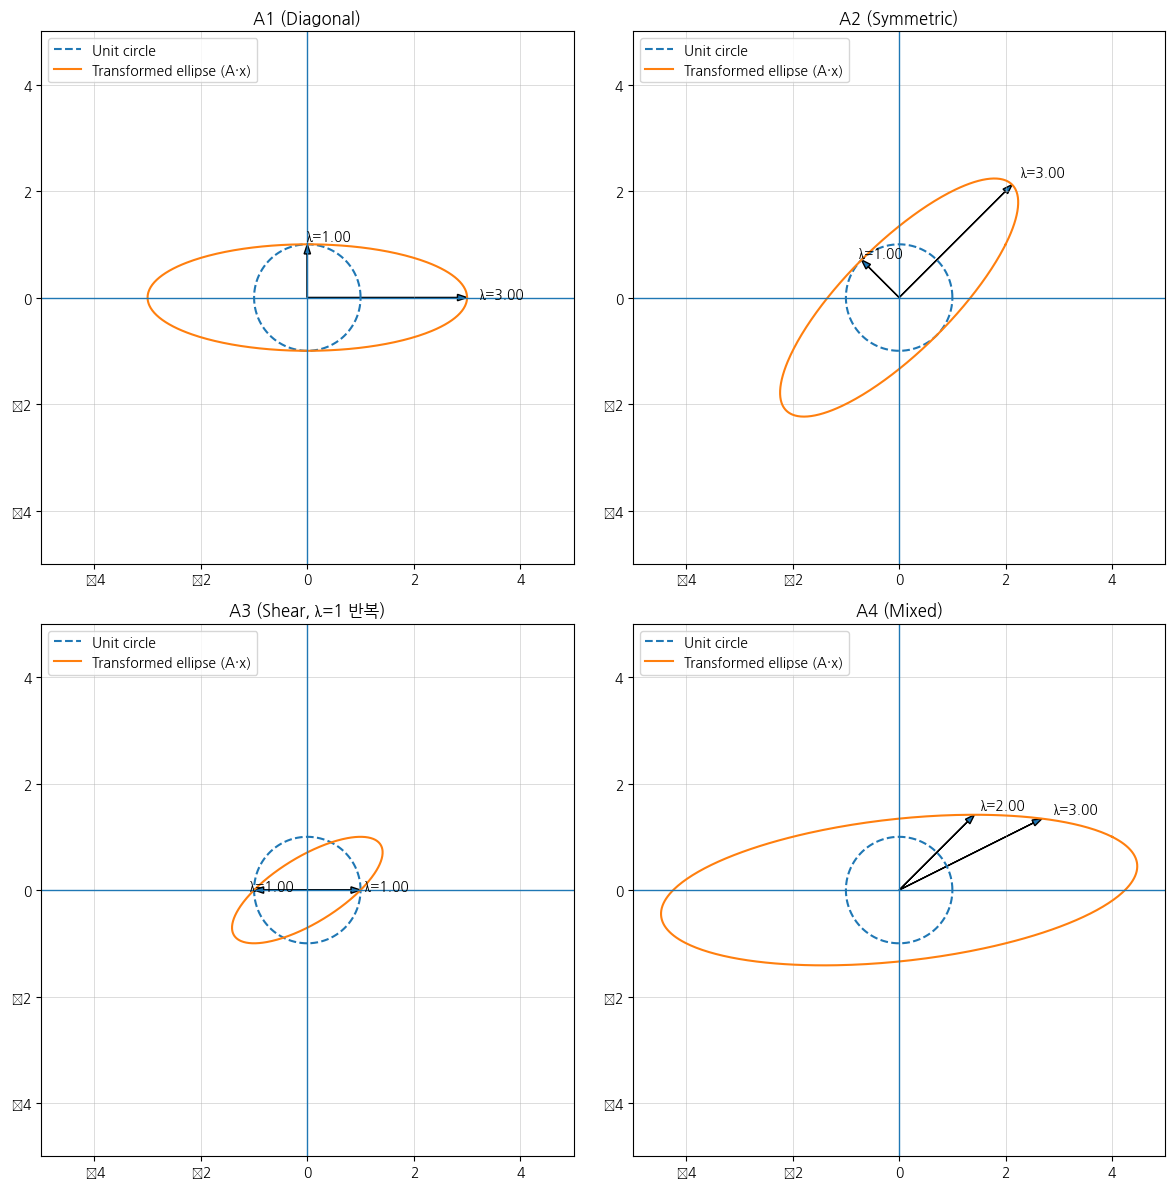

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# ===== 유틸 함수 =====
def unit_circle(n=400):
    t = np.linspace(0, 2*np.pi, n)
    return np.vstack([np.cos(t), np.sin(t)])  # shape (2, n)

def eig_real(A, atol=1e-10):
    """A의 고유값/고유벡터 중 실수인 것만 반환 (복소수는 시각화 생략)"""
    w, V = np.linalg.eig(A)
    real_idx = [i for i, lam in enumerate(w) if abs(np.imag(lam)) < atol]
    w_real = np.real(w[real_idx])
    V_real = np.real(V[:, real_idx])
    return w_real, V_real

def draw_axes(ax, lim=5):
    ax.axhline(0, lw=1)
    ax.axvline(0, lw=1)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.grid(True, lw=0.5, alpha=0.6)

def plot_matrix(ax, A, title=None, annotate=True):
    # 단위원과 타원
    C = unit_circle()
    E = A @ C

    ax.plot(C[0], C[1], '--', label='Unit circle')
    ax.plot(E[0], E[1], '-',  label='Transformed ellipse (A·x)')

    # 실수 고유값/고유벡터만 표시
    w, V = eig_real(A)
    for i in range(len(w)):
        v = V[:, i]
        # 방향만 보이도록 정규화 후 고유값으로 스케일
        v = v / np.linalg.norm(v) * w[i]
        ax.arrow(0, 0, v[0], v[1], head_width=0.12, length_includes_head=True)
        if annotate:
            ax.text(v[0]*1.08, v[1]*1.08, f"λ={w[i]:.2f}", fontsize=10)

    draw_axes(ax)
    if title:
        ax.set_title(title)
    ax.legend(loc='upper left')

# ===== 테스트용 행렬들 =====
matrices = {
    "A1 (Diagonal)": np.array([[3.0, 0.0],
                               [0.0, 1.0]]),                 # 축 방향 고유벡터

    "A2 (Symmetric)": np.array([[2.0, 1.0],
                                [1.0, 2.0]]),                # 대칭: 직교 고유벡터 (~[1,1], [1,-1])

    "A3 (Shear, λ=1 반복)": np.array([[1.0, 1.0],
                                     [0.0, 1.0]]),           # 결함 행렬: 고유벡터 1개 (x축)

    "A4 (Mixed)": np.array([[4.0, -2.0],
                            [1.0,  1.0]]),                   # 서로 다른 실수 고유값

    # "A5 (Rotation, complex λ)": np.array([[0.0, -1.0],
    #                                      [1.0,  0.0]]),   # 회전: 복소 고유값 → 벡터 표시 생략
}

# ===== 그리기 (그리드) =====
cols = 2
rows = int(np.ceil(len(matrices) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(12, 6*rows))
axes = np.array(axes).reshape(rows, cols)

for ax, (name, A) in zip(axes.ravel(), matrices.items()):
    plot_matrix(ax, A, title=name)

# 남는 축 정리
for i in range(len(matrices), rows*cols):
    axes.ravel()[i].axis('off')

plt.tight_layout()
plt.show()

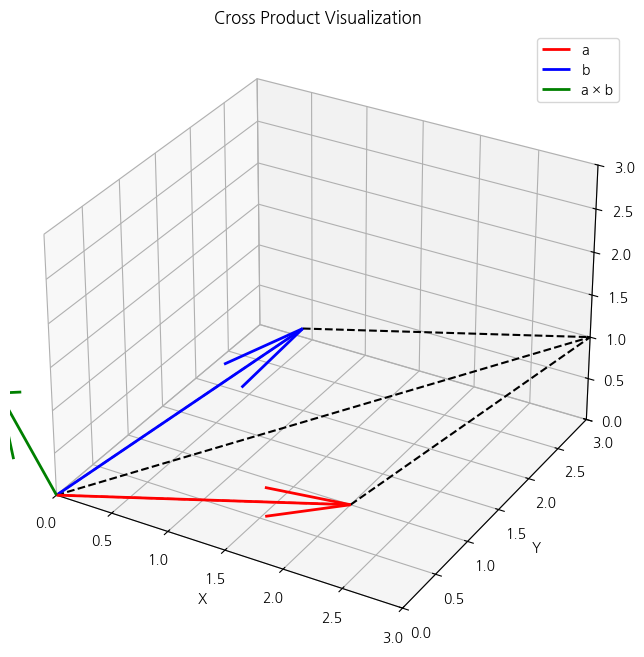

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 두 벡터 정의
a = np.array([2, 1, 0])
b = np.array([1, 2, 1])

# 외적
c = np.cross(a, b)

# 플롯 준비
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# 벡터 그리기
ax.quiver(0,0,0, a[0], a[1], a[2], color='r', label='a', linewidth=2)
ax.quiver(0,0,0, b[0], b[1], b[2], color='b', label='b', linewidth=2)
ax.quiver(0,0,0, c[0], c[1], c[2], color='g', label='a × b', linewidth=2)

# 평행사변형 시각화 (a, b span)
parallelogram = np.array([[0,0,0], a, a+b, b])
ax.plot([0,a[0]],[0,a[1]],[0,a[2]], 'r--')
ax.plot([0,b[0]],[0,b[1]],[0,b[2]], 'b--')
ax.plot([a[0],a[0]+b[0]],[a[1],a[1]+b[1]],[a[2],a[2]+b[2]],'k--')
ax.plot([b[0],a[0]+b[0]],[b[1],a[1]+b[1]],[b[2],a[2]+b[2]],'k--')
ax.plot([0,a[0]+b[0]],[0,a[1]+b[1]],[0,a[2]+b[2]],'k--')

# 그래프 설정
ax.set_xlim([0,3])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Cross Product Visualization")
ax.legend()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1744\14301729.py:57: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=100, blit=True)


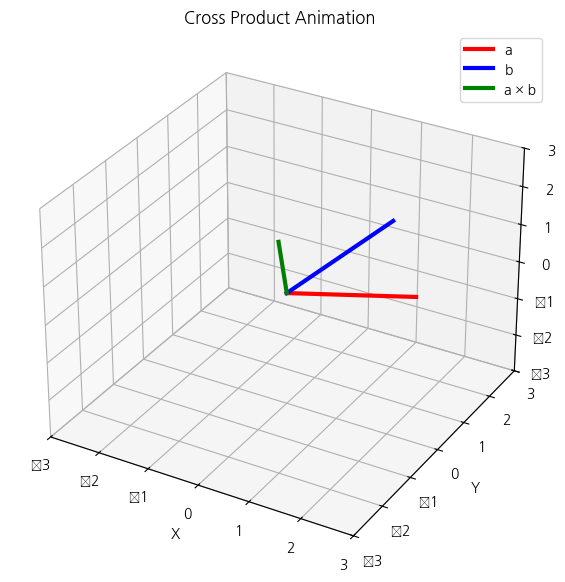

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 초기 벡터
a = np.array([2, 1, 0])
b = np.array([1, 2, 1])

# 회전 행렬 (z축 회전)
def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

# figure 초기화
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# 벡터 화살표 (quiver는 업데이트가 어려워 Line3D로 그림)
vec_a, = ax.plot([], [], [], 'r-', linewidth=3, label='a')
vec_b, = ax.plot([], [], [], 'b-', linewidth=3, label='b')
vec_c, = ax.plot([], [], [], 'g-', linewidth=3, label='a × b')

# 세팅
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Cross Product Animation")
ax.legend()

# 업데이트 함수
def update(frame):
    theta = np.radians(frame)
    R = rotation_matrix_z(theta)
    a_rot = R @ a
    b_rot = R @ b
    c_rot = np.cross(a_rot, b_rot)

    vec_a.set_data([0, a_rot[0]], [0, a_rot[1]])
    vec_a.set_3d_properties([0, a_rot[2]])

    vec_b.set_data([0, b_rot[0]], [0, b_rot[1]])
    vec_b.set_3d_properties([0, b_rot[2]])

    vec_c.set_data([0, c_rot[0]], [0, c_rot[1]])
    vec_c.set_3d_properties([0, c_rot[2]])

    return vec_a, vec_b, vec_c

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=100, blit=True)
plt.show()

In [ ]:
# outline_from_image.py
# Pillow + NumPy 로 이미지 윤곽(Outline) 그리기
# pip install pillow

import math
import numpy as np
from PIL import Image

# ---------------------------
# 공통: 2D 컨볼루션 (same)
# ---------------------------
def conv2d_same(img, kernel):
    H, W = img.shape
    kH, kW = kernel.shape
    assert kH % 2 == 1 and kW % 2 == 1
    pad_y, pad_x = kH // 2, kW // 2

    padded = np.zeros((H + 2*pad_y, W + 2*pad_x), dtype=np.float32)
    padded[pad_y:pad_y+H, pad_x:pad_x+W] = img

    out = np.zeros_like(img, dtype=np.float32)
    k = np.flipud(np.fliplr(kernel)).astype(np.float32)  # 컨볼루션 정의

    for y in range(H):
        for x in range(W):
            region = padded[y:y+kH, x:x+kW]
            out[y, x] = np.sum(region * k)
    return out

# ---------------------------
# 가우시안 블러 (분리합성)
# ---------------------------
def gaussian_kernel_1d(sigma, radius=None):
    if radius is None:
        radius = max(1, int(3*sigma))
    x = np.arange(-radius, radius+1, dtype=np.float32)
    k = np.exp(-(x*x)/(2*sigma*sigma))
    k /= np.sum(k)
    return k.reshape(1, -1)  # row vector

def conv_separable(img, k1d):
    # 가로 -> 세로
    # 가로
    kx = k1d
    ky = k1d.T
    tmp = conv2d_same(img, kx)
    out = conv2d_same(tmp, ky)
    return out

# ---------------------------
# Sobel 기울기
# ---------------------------
Kx = np.array([[+1, 0, -1],
               [+2, 0, -2],
               [+1, 0, -1]], dtype=np.float32)

Ky = np.array([[+1, +2, +1],
               [ 0,  0,  0],
               [-1, -2, -1]], dtype=np.float32)

def sobel_gradients(img):
    gx = conv2d_same(img, Kx)
    gy = conv2d_same(img, Ky)
    mag = np.sqrt(gx*gx + gy*gy)
    ang = np.arctan2(gy, gx)  # [-pi, pi]
    return gx, gy, mag, ang

# ---------------------------
# 비최대 억제 (간단한 방향 양자화)
# ---------------------------
def non_maximum_suppression(mag, ang):
    H, W = mag.shape
    out = np.zeros_like(mag, dtype=np.float32)

    # 각도 [0,180) 로 변환
    angle = (np.degrees(ang) + 180.0) % 180.0

    for y in range(1, H-1):
        for x in range(1, W-1):
            a = angle[y, x]
            m = mag[y, x]

            # 4방향(0,45,90,135)으로 양자화
            if (0 <= a < 22.5) or (157.5 <= a < 180):
                p, q = mag[y, x-1], mag[y, x+1]
            elif 22.5 <= a < 67.5:
                p, q = mag[y-1, x+1], mag[y+1, x-1]
            elif 67.5 <= a < 112.5:
                p, q = mag[y-1, x], mag[y+1, x]
            else:  # 112.5 ~ 157.5
                p, q = mag[y-1, x-1], mag[y+1, x+1]

            if m >= p and m >= q:
                out[y, x] = m
            else:
                out[y, x] = 0.0
    return out

# ---------------------------
# 이중 임계 + 히스테리시스
# ---------------------------
def double_threshold_hysteresis(nms, low_ratio=0.1, high_ratio=0.25):
    mmax = nms.max() + 1e-6
    high = high_ratio * mmax
    low  = low_ratio  * mmax

    strong = (nms >= high)
    weak   = (nms >= low) & ~strong

    H, W = nms.shape
    out = np.zeros((H, W), dtype=np.uint8)

    # strong 은 즉시 엣지로 확정
    out[strong] = 255

    # weak 이 strong과 연결되어 있으면 엣지로 승격 (8-이웃)
    changed = True
    while changed:
        changed = False
        # weak 픽셀 중 이웃에 strong(out=255)이 있으면 승격
        ys, xs = np.where(weak & (out == 0))
        for y, x in zip(ys, xs):
            y0, y1 = max(0, y-1), min(H-1, y+1)
            x0, x1 = max(0, x-1), min(W-1, x+1)
            if np.any(out[y0:y1+1, x0:x1+1] == 255):
                out[y, x] = 255
                weak[y, x] = False
                changed = True
        # 더 이상 승격될 것이 없으면 종료
    return out

# ---------------------------
# 윤곽 추출 파이프라인
# ---------------------------
def outline_from_image(input_path, blur_sigma=1.2, low_ratio=0.08, high_ratio=0.2,
                       save_mask="outline_mask.png", save_overlay="outline_overlay.png"):
    # 1) 로드 & 그레이스케일 float32
    img_pil = Image.open(input_path).convert("L")
    gray = np.array(img_pil, dtype=np.float32)

    # 2) 가우시안 블러(노이즈 완화)
    g1d = gaussian_kernel_1d(blur_sigma)
    smooth = conv_separable(gray, g1d)

    # 3) Sobel 기울기
    gx, gy, mag, ang = sobel_gradients(smooth)

    # 4) 비최대 억제 → 얇은 엣지
    nms = non_maximum_suppression(mag, ang)

    # 5) 이중 임계 + 히스테리시스 → 최종 윤곽 마스크
    mask = double_threshold_hysteresis(nms, low_ratio, high_ratio)

    # 저장: 마스크
    Image.fromarray(mask).save(save_mask)

    # 저장: 원본 RGB + 윤곽 오버레이
    rgb = Image.open(input_path).convert("RGB")
    rgb_np = np.array(rgb, dtype=np.uint8)
    overlay = rgb_np.copy()
    # 윤곽(흰색) 그리기
    overlay[mask > 0] = [255, 255, 255]
    Image.fromarray(overlay).save(save_overlay)

    print(f"Saved: {save_mask}, {save_overlay}")

# ---------------------------
# 실행 예시
# ---------------------------
if __name__ == "__main__":
    # 사용 예:
    # outline_from_image("your_image.png", blur_sigma=1.2, low_ratio=0.08, high_ratio=0.2)
    # 파라미터는 이미지 노이즈/해상도에 맞춰 조정하세요.
    outline_from_image("images/1001/4.WEBP", blur_sigma=1.2, low_ratio=0.08, high_ratio=0.2)
